# Snake

In [11]:
import environments_fully_observable 
import environments_partially_observable
import numpy as np
from  tqdm import trange
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from agent import *
tf.random.set_seed(0)
random.seed(0)
import math
np.random.seed(0)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
reward_history_conv=[0]
EPOCHS=1
env_ = get_env()
agent=Qnet()
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_conv[-30:]) or 0}", end="\n")
    state=env_.to_state()
    #state=tf.reshape(state, (1000, -1))
    value=agent.call(state)
    print(value)
    value.shape

NameError: name 'get_env' is not defined

In [40]:
tf.argmax(value, -1)

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 3, 1, 1, 1, 0, 1, 0, 1, 3, 1, 1, 1, 1, 0, 1, 1, 3, 1,
       1, 0, 1, 3, 0, 1, 1, 1, 3, 1, 1, 0, 1, 3, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
    

## Environment definition

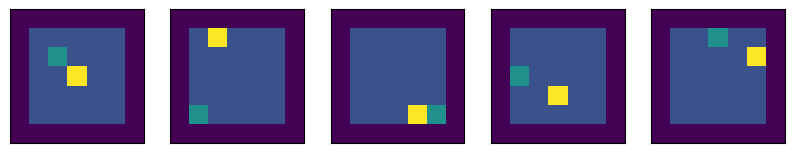

In [5]:
%matplotlib inline
# function to standardize getting an env for the whole notebook
def get_env(n=1000):
    # n is the number of boards that you want to simulate parallely
    # size is the size of each board, also considering the borders
    # mask for the partially observable, is the size of the local neighborhood
    size = 7
    e = environments_fully_observable.OriginalSnakeEnvironment(n, size)
    # or environments_partially_observable.OriginalSnakeEnvironment(n, size, 2)
    return e
env_ = get_env()
GAMMA = .9
ITERATIONS = 5000

fig,axs=plt.subplots(1,min(len(env_.boards), 5), figsize=(10,3))
for ax, board in zip(axs, env_.boards):
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.imshow(board, origin="lower")

## Model

## Training

0/1500 - 0
50/1500 - 0
100/1500 - 0.010663332417607307
150/1500 - 0.02537333220243454
200/1500 - 0.04411666840314865
250/1500 - 0.053406666964292526
300/1500 - 0.05777333676815033
350/1500 - 0.05735332891345024
400/1500 - 0.06543000042438507
450/1500 - 0.0640299990773201
500/1500 - 0.06528666615486145
550/1500 - 0.06597333401441574
600/1500 - 0.06994666904211044
650/1500 - 0.07172999531030655
700/1500 - 0.07548332959413528
750/1500 - 0.0737999901175499
800/1500 - 0.07945333421230316
850/1500 - 0.07628333568572998
900/1500 - 0.07167332619428635
950/1500 - 0.07692000269889832
1000/1500 - 0.08071999251842499
1050/1500 - 0.08134666830301285
1100/1500 - 0.07914001494646072
1150/1500 - 0.08370665460824966
1200/1500 - 0.08483333140611649
1250/1500 - 0.08111333101987839
1300/1500 - 0.08384332060813904
1350/1500 - 0.08166667073965073
1400/1500 - 0.08027332276105881
1450/1500 - 0.08377666771411896


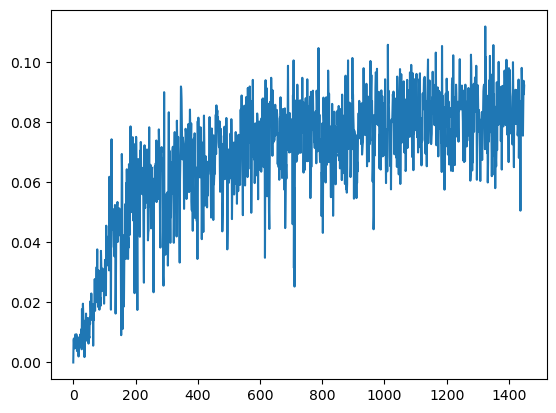

In [8]:
reward_history_agent=[0]
EPOCHS=1500
env_ = get_env()
agent=new_agent(env=env_)
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_agent[-30:]) or 0}", end="\n")
    state=env_.to_state()
    state=tf.reshape(state, (1000, -1))

    original_probs = agent.actor(state)
    pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
    samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
    actions=tf.reshape(samples, (samples.shape[0],1))

    masks=env_.check_actions(actions)

    rewards= env_.move(actions)
    new_state = tf.constant(env_.to_state())
    new_state=tf.reshape(new_state, (1000, -1))

    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    if e > 50: reward_history_agent.append(np.mean(rewards))
plt.plot(reward_history_agent)

In [12]:
reward_history_agent=[0]
EPOCHS=1500
env_ = get_env()
agent=TRPO_agent(env=env_)
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_agent[-30:]) or 0}", end="\n")
    state=env_.to_state()
    state=tf.reshape(state, (1000, -1))

    original_probs = agent.actor(state)
    pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
    samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
    actions=tf.reshape(samples, (samples.shape[0],1))

    masks=env_.check_actions(actions)

    rewards= env_.move(actions)
    new_state = tf.constant(env_.to_state())
    new_state=tf.reshape(new_state, (1000, -1))

    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    if e > 50: reward_history_agent.append(np.mean(rewards))
plt.plot(reward_history_agent)

0/1500 - 0


2024-05-27 09:14:33.374840: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at strided_slice_op.cc:105 : INVALID_ARGUMENT: Index out of range using input dim 0; input has only 0 dims


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} Index out of range using input dim 0; input has only 0 dims [Op:StridedSlice] name: strided_slice/

In [4]:
reward_history_deep=[0]
EPOCHS=1500
env_ = get_env()
agent=agent_deep(env=env_)
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_deep[-30:]) or 0}", end="\n")
    state=env_.to_state()
    state=tf.reshape(state, (1000, -1))

    original_probs = agent.actor(state)
    pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
    samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
    actions=tf.reshape(samples, (samples.shape[0],1))

    masks=env_.check_actions(actions)

    rewards= env_.move(actions)
    new_state = tf.constant(env_.to_state())
    new_state=tf.reshape(new_state, (1000, -1))

    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    if e > 50: reward_history_deep.append(np.mean(rewards))
plt.plot(reward_history_deep)

0/1000 - 0
50/1000 - 0
100/1000 - 0.0108133340254426
150/1000 - -3.333333552291151e-06
200/1000 - -1.0000000656873453e-05
250/1000 - -3.333333552291151e-06
300/1000 - 0
350/1000 - 0
400/1000 - 0
450/1000 - -3.333333552291151e-06
500/1000 - 0
550/1000 - -3.333333552291151e-06


KeyboardInterrupt: 

0/1500 - 0
50/1500 - 0
100/1500 - 0.0226299986243248
150/1500 - 0.049123335629701614
200/1500 - 0.05914333835244179
250/1500 - 0.06014333665370941
300/1500 - 0.06997332721948624
350/1500 - 0.07274666428565979
400/1500 - 0.07237332314252853
450/1500 - 0.07431333512067795
500/1500 - 0.0737166702747345
550/1500 - 0.07093332707881927
600/1500 - 0.07670333981513977
650/1500 - 0.07989666610956192
700/1500 - 0.07630332559347153
750/1500 - 0.07903333753347397
800/1500 - 0.07981666922569275
850/1500 - 0.08025334030389786
900/1500 - 0.07692667096853256
950/1500 - 0.08205666393041611
1000/1500 - 0.07918665558099747
1050/1500 - 0.08387000113725662
1100/1500 - 0.08397665619850159
1150/1500 - 0.0835866704583168
1200/1500 - 0.08481000363826752
1250/1500 - 0.08562666922807693
1300/1500 - 0.08567667007446289
1350/1500 - 0.08471666276454926
1400/1500 - 0.08690999448299408
1450/1500 - 0.08902665972709656


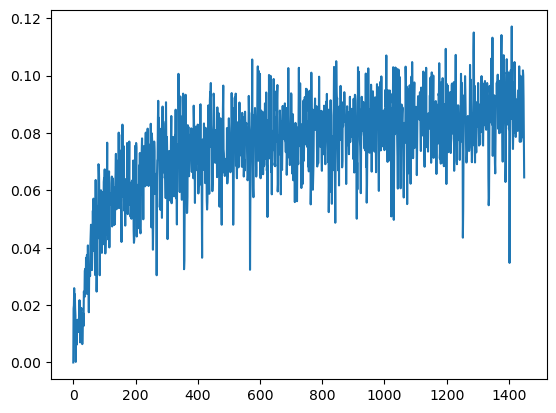

In [9]:
reward_history_conv=[0]
EPOCHS=1500
env_ = get_env()
agent=conv_agent(env=env_)
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_conv[-30:]) or 0}", end="\n")
    state=env_.to_state()
    #state=tf.reshape(state, (1000, -1))

    original_probs = agent.actor(state)
    pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
    samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
    actions=tf.reshape(samples, (samples.shape[0],1))

    masks=env_.check_actions(actions)

    rewards= env_.move(actions)
    new_state = tf.constant(env_.to_state())
    #new_state=tf.reshape(new_state, (1000, -1))

    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    if e > 50: reward_history_conv.append(np.mean(rewards))
plt.plot(reward_history_conv)

In [19]:
reward_history_conv=[0]
EPOCHS=1000
env_ = get_env()
agent=Duelling(env=env_)
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_conv[-30:]) or 0}", end="\n")
    state=env_.to_state()
    #state=tf.reshape(state, (1000, -1))

    original_probs = agent.model.call(state)
    pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
    samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
    actions=tf.reshape(samples, (samples.shape[0],1))

    masks=env_.check_actions(actions)

    rewards= env_.move(actions)
    new_state = tf.constant(env_.to_state())
    #new_state=tf.reshape(new_state, (1000, -1))

    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    if e > 50: reward_history_conv.append(np.mean(rewards))
plt.plot(reward_history_conv)

0/1000 - 0


TypeError: 'Qnet' object is not callable

In [ ]:
for iteration in trange(ITERATIONS):
    # get current state of the boards
    state = env_.to_state() # this is the state
    state=tf.reshape(state, (1000, ))
    original_probs=agent.actor(state)
    samples = tf.random.categorical(math.log(original_probs), 1)[:, 0]
    
    reward=[]
    with tf.GradientTape(persistent=True) as tape:
        """ 
        tensor of actions, consider that
            UP = 0
            RIGHT = 1
            DOWN = 2
            LEFT = 3
        """
        actions = samples
        rewards = env_.move(actions)
        new_state = tf.constant(env_.to_state())

        # calculate the loss of whichever algorithm you have picked
        loss = ...

    gradient = tape.gradient(..., ...)
    optimizer.apply_gradients(zip(gradient, ...))

 ### Random policy reward
 
Just a baseline (not the one you are supposed to develop)

In [6]:
random_env = get_env(100)
random_rewards = []

for _ in trange(1000):
    probs = tf.convert_to_tensor([[.25]*4]*random_env.n_boards)
    #sample actions
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    # MDP update
    rewards = random_env.move(actions)
    random_rewards.append(np.mean(rewards))

100%|██████████| 1000/1000 [00:01<00:00, 505.10it/s]


In [10]:
random_rewards = []
env_ = get_env()

for _ in trange(1500):
    probs = tf.convert_to_tensor([[.25]*4]*env_.n_boards)
    #sample actions
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    # MDP update
    rewards = env_.move(actions)
    random_rewards.append(np.mean(rewards))

100%|██████████| 1500/1500 [00:17<00:00, 87.86it/s] 


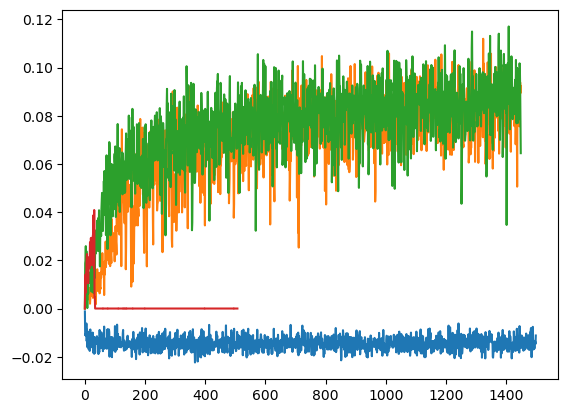

In [11]:
plt.plot(random_rewards)
plt.plot(reward_history_agent)
plt.plot(reward_history_conv)
plt.plot(reward_history_deep)